# Część I - WCZYTYWANIE PLIKÓW
### Skrypt zawiera funkcje pozwalające na wczytanie plików '*.csv' pochodzących z aplikacji Power Sense
### Funkcja read_PowerSense_file_pd(file, cols, cols_header):
#### - file - nazwa pliku
#### - cols - zakres kolumn do wczytania (lista z numerami kolumn)
#### - cols_header - nazwy dla kolejnych wczytywanych kolumn
#### - zwracany jest DataFrame pandas, wiersze - kolejne chwile czasu, kolumny - wartości parametrów w kolejnych chwilach czasu

### Funkcja read_PowerSense_file_np(file, cols, cols_header):
#### - file - nazwa pliku
#### - cols - zakres kolumn do wczytania (lista z numerami kolumn)
#### - cols_header - nazwy dla kolejnych wczytywanych kolumn
#### - zwracana jest tablica 2D numpy, wiersze - kolejne chwile czasu, kolumny - wartości parametrów w kolejnych chwilach czasu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import os

#nazwa pliku z danymi
file = '15CH2L.csv'
#zakres kolumn do wczytania
cols = list(range(0,16))
#nazwy kolumn
cols_header = ['t', 'roll', 'pitch', 'yaw', 'rotX', 'rotY', 'rotZ', 'gravityX', 'gravityY', 'gravityZ',
              'accX', 'accY', 'accZ', 'magnetX', 'magnetY', 'magnetZ']
# !!!! len(cols) == len(cols_header) !!!!

#PANDAS - FUNKCJA WCZYTUJĄCA

def read_PowerSense_file_pd(file, cols, cols_header): 
    if os.path.isfile(file):
        #wczytanie pliku
        data_pd=pd.read_csv(file, sep=',', header=0, usecols=cols)
        #pominięcie wierszy z NaN
        data_pd=data_pd.dropna()
        #zmiana nazw kolumn
        data_pd.columns = cols_header
        #rozpoczęcie liczenia czasu od 0
        data_pd['t'] = data_pd['t'] - min(data_pd['t'])
        #wypisanie pierwszych 10 wierszy
        #print(data_pd.iloc[0:10,:])
        #print(data_pd.values[0:10, :])
    else:
        print('Plik '+file+' nie istnieje.')
    
    return data_pd

#dostęp do kolumn
#print(data_pd['rotZ']) #kolumna rotation Z
#dostęp do wierszy
#print(data_pd.values[0,:]) #pierwszy wiersz danych
#dostęp do pojedynczej wartości
#print(data_pd.values[4, 6]) #piąty wiersz, siódma kolumna -> rotation Z
#dostęp do fragmetu tablicy
#print(data_pd.values[0:2, 0:4]) # dwa pierwsze wiersze, cztery pierwsze kolumny ?

#NUMPY - FUNKCJA WCZYTUJĄCA

def read_PowerSense_file_np(file, cols, cols_header):  
    if os.path.isfile(file):
        #wczytanie pliku
        data_np = np.genfromtxt(file, delimiter=',', skip_header=1, usecols=cols)
        #pominięcie wierszy z NaN
        data_np = data_np[~np.isnan(data_np).any(axis=1)]
        #rozpoczęcie liczenia czasu od 0
        data_np[:, 0] = data_np[:, 0] - min(data_np[:, 0])
        #wypisanie pierwszych 10 wierszy
        #print(data_np[10, :])
    else:
        print('Plik '+file+' nie istnieje.')
        
    return data_np

#dostęp do elementów
#print(data_np[0:3, 0:4]) # trzy pierwsze wiersze, cztery pierwsze kolumny ?

#WYWOŁANIE FUNKCJI WCZYTUJĄCYCH
data_pd = read_PowerSense_file_pd(file, cols, cols_header)
data_np = read_PowerSense_file_np(file, cols, cols_header)

#wyświetlenie parametru roll pandas
plt.plot(data_pd.values[:, 0], data_pd.values[:, 1])
plt.xlabel('time [s]')
plt.ylabel('roll [rad]')
plt.title('Wykres zależności roll od czasu - pandas')
plt.show()

#wyświetlenie parametru roll numpy
plt.plot(data_np[:, 0], data_np[:, 1])
plt.xlabel('time [s]')
plt.ylabel('roll [rad]')
plt.title('Wykres zależności roll od czasu - numpy')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

### PRZYKŁAD
#### Wczytanie przykładowych ruchów (poziome, pionowe, przód/tył, koło) z aplikacji PowerSense.
#### Wizualizacja przebiegu wybranych parametrów.

POZIOME


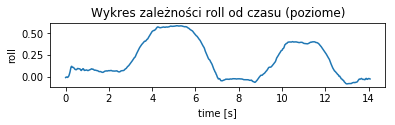

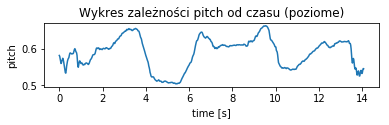

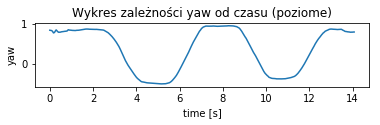

PIONOWE


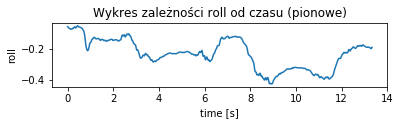

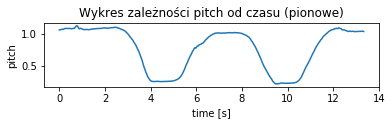

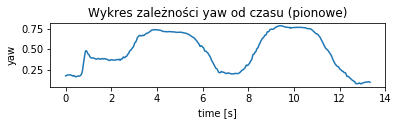

PRZÓD/TYŁ


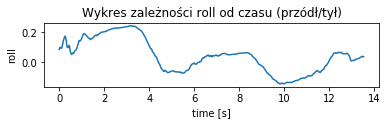

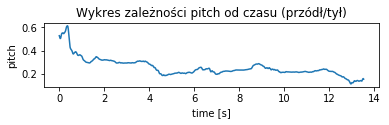

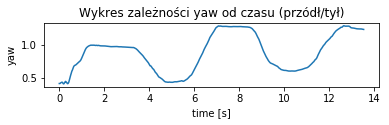

KOŁO


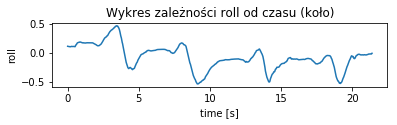

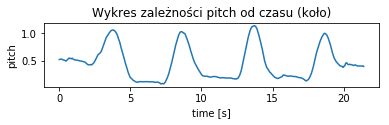

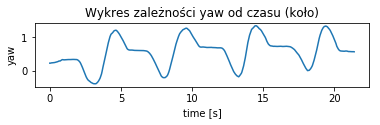

In [2]:
files = ['poziomeKP1.csv', 'pionoweKP1.csv', 'przodtylKP1.csv', 'koloKP1.csv']
headers = ['t', 'roll', 'pitch', 'yaw', 'rotX', 'rotY', 'rotZ', 'gravityX', 'gravityY', 'gravityZ',
              'accX', 'accY', 'accZ', 'magnetX', 'magnetY', 'magnetZ']
cols = list(range(0,16))

#___________________________POZIOME__________________________________

data_pd=read_PowerSense_file_pd(files[0], cols, headers)
print('POZIOME')

plt.subplot(311)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 1])
plt.xlabel('time [s]')
plt.ylabel('roll')
plt.title('Wykres zależności roll od czasu (poziome)')
plt.show()

plt.subplot(312)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 2])
plt.xlabel('time [s]')
plt.ylabel('pitch')
plt.title('Wykres zależności pitch od czasu (poziome)')
plt.show()

plt.subplot(312)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 3])
plt.xlabel('time [s]')
plt.ylabel('yaw')
plt.title('Wykres zależności yaw od czasu (poziome)')
plt.show()

#____________________________PIONOWE_________________________________

data_pd=read_PowerSense_file_pd(files[1], cols, headers)
print('PIONOWE')

plt.subplot(311)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 1])
plt.xlabel('time [s]')
plt.ylabel('roll')
plt.title('Wykres zależności roll od czasu (pionowe)')
plt.show()

plt.subplot(312)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 2])
plt.xlabel('time [s]')
plt.ylabel('pitch')
plt.title('Wykres zależności pitch od czasu (pionowe)')
plt.show()

plt.subplot(312)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 3])
plt.xlabel('time [s]')
plt.ylabel('yaw')
plt.title('Wykres zależności yaw od czasu (pionowe)')
plt.show()

#___________________________PRZÓD/TYŁ__________________________________

data_pd=read_PowerSense_file_pd(files[2], cols, headers)
print('PRZÓD/TYŁ')

plt.subplot(311)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 1])
plt.xlabel('time [s]')
plt.ylabel('roll')
plt.title('Wykres zależności roll od czasu (przódł/tył)')
plt.show()

plt.subplot(312)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 2])
plt.xlabel('time [s]')
plt.ylabel('pitch')
plt.title('Wykres zależności pitch od czasu (przódł/tył)')
plt.show()

plt.subplot(312)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 3])
plt.xlabel('time [s]')
plt.ylabel('yaw')
plt.title('Wykres zależności yaw od czasu (przódł/tył)')
plt.show()

#___________________________KOŁO__________________________________

data_pd=read_PowerSense_file_pd(files[3], cols, headers)
print('KOŁO')

plt.subplot(311)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 1])
plt.xlabel('time [s]')
plt.ylabel('roll')
plt.title('Wykres zależności roll od czasu (koło)')
plt.show()

plt.subplot(312)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 2])
plt.xlabel('time [s]')
plt.ylabel('pitch')
plt.title('Wykres zależności pitch od czasu (koło)')
plt.show()

plt.subplot(312)
plt.plot(data_pd.values[:, 0], data_pd.values[:, 3])
plt.xlabel('time [s]')
plt.ylabel('yaw')
plt.title('Wykres zależności yaw od czasu (koło)')
plt.show()

### WŁAŚCIWY SKRYPT WCZYTUJĄCY
#### 1. Wygenerowanie nazw plików z pomiarami:
  - funkcja generate_files_names(moves, people, number),
  - moves: lista z nazwami ruchów,
  - people: lista z inicjałami osób,
  - number: lista z numerami pomiarów,
  - wzorzec nazewnictwa plików: MovesPeopleNumber.csv (np. poziomeKP1.csv to 1. pomiar Kasi P. dla ruchu poziomego),
  - parametr zwracany: mix - lista przechowująca kolejne nazwy plików.

#### 2. Wczytanie kolejnych plików.
#### 3. Wygenerowanie wektorów cech:
  - po wczytaniu kolejnego pliku generowany jest dla niego wektor cech (żeby niepotrzebnie nie zaśmiecać pamięci),
  - wektory cech zapisywane w DataFrame pandas o nazwie features,
  - DataFrame features: wiersze - pomiary, kolumny - cechy.

#### 4. Zapisanie wektora cech do pliku features.csv
#### 5. Odczyt z pliku features.csv wektora cech
#### 6. Konwersja do NumPy array

In [3]:
# AD 1

#funkcja generująca nazwy plików z pomiarami z aplikacji PowerSense
def generate_files_names(moves, people, number):
    mix = []
    for m in moves:
        for p in people:
            for n in number:
                mix.append(m+p+str(n)+'.csv')
                
    return mix

#dane do generowania nazw plików
moves = ['poziome', 'pionowe', 'przodtyl', 'kolo']
#people = ['FB', 'FJ', 'KS', 'KP', 'JO', 'MB']
people = ['KP']
#number = list(range(1, 10))
number = list(range(1, 3))

#dane do generowania tablicy z danymi pomiarowymi (nazwy kolumn i licznik kolumn)
cols_headers = ['t', 'roll', 'pitch', 'yaw', 'rotX', 'rotY', 'rotZ', 'gravityX', 'gravityY', 'gravityZ',
                'accX', 'accY', 'accZ', 'magnetX', 'magnetY', 'magnetZ']
cols = list(range(0,len(cols_headers)))

#dane do generowania tablicy cech (nazwy cech)
features_headers = ['roll_mean', 'pitch_mean', 'yaw_mean', 'rotX_min', 'rotY_min', 'rotZ_min','accX_max',
                    'accY_max', 'accZ_max']

#generowanie nazw plików
mix = generate_files_names(moves, people, number)
#print(mix)

#tablica przechowująca cechy (kolumny to nazwy cech)
features = pd.DataFrame(columns=features_headers, index=range(len(mix)))



# AD 2 i 3

#wczytanie pliku i wygenerowanie przykładowej tablicy cech
for m, i in zip(mix, range(0,len(mix))):
    #wczytanie pliku do pandas
    data_pd=read_PowerSense_file_pd(m, cols, cols_headers)
    
    #wyznaczenie 9 cech dla danego pomiaru
    #średnia dla kolumn 'roll', 'pitch', 'yaw'
    srednia_tmp = [ np.mean(data_pd[col].tolist()) for col in data_pd[['roll', 'pitch', 'yaw']] ]
    #minimum dla kolumn 'rotX', 'rotY', 'rotZ'
    minim_tmp = [ min(data_pd[col]) for col in data_pd[['rotX', 'rotY', 'rotZ']] ]
    #maksimum dla kolumn 'accX', 'accY', 'accZ'
    maxim_tmp = [ max(data_pd[col]) for col in data_pd[['accX', 'accY', 'accZ']] ]
    
    #zbudowanie wektora cech dla danego pomiaru
    features_tmp = srednia_tmp + minim_tmp + maxim_tmp
    
    #wpisanie wektora cech do tablicy pandas
    for f_h, j in zip(features_headers, range(0,len(features_headers))):
        features.iloc[i, features.columns.get_loc(f_h)] = features_tmp[j]

#JAK KORZYSTAĆ Z TABLICY Z WEKTOREM CECH        
#tablica (DataFrame) pandas przechowuje wektory cech
#wiersze to kolejne pomiary
#kolumny to kolejne cechy

#dostęp do kolumn
#print(features['roll_mean']) #kolumna rotation Z
#dostęp do wierszy
#print(features.values[0,:]) #pierwszy wiersz danych
#dostęp do pojedynczej wartości
#print(features.values[4, 2]) #piąty wiersz, trzecia kolumna -> yaw_mean

#wypisanie całej tablicy cech
#print(features)


# AD 4

#zapis tablicy cech do pliku
file_with_features = 'features.csv'
features.to_csv(file_with_features, encoding='utf-8', sep=',', index=False)


# AD 5

#funkcja wczytująca tablice cech z pliku
def read_feature_file(file, cols_headers): 
    if os.path.isfile(file):
        #wczytanie pliku
        features=pd.read_csv(file, sep=',', header=0)
        #pominięcie wierszy z NaN
        features=features.dropna()
        #zmiana nazw kolumn
        features.columns = cols_headers
        #wypisanie kilku pierwszych wierszy
        #print(features.head())
    
    return features

features_pd = read_feature_file(file_with_features, features_headers)
print('Pandas DataFrame z wektorami cech:')
print(features_pd.head())
print('')


# AD 6

features_np = features_pd.values
print('NumPy array z wektorami cech:')
print(features_np[0:5, :])

Pandas DataFrame z wektorami cech:
   roll_mean  pitch_mean  yaw_mean  rotX_min  rotY_min  rotZ_min  accX_max  \
0   0.199675    0.589132  0.370449 -0.952482 -0.679311 -0.978008  0.128484   
1  -0.008393   -0.013551  0.557564 -0.196187 -0.655314 -0.709238  0.315554   
2  -0.232845    0.771156  0.474767 -1.243861 -0.893899 -0.635747  0.092409   
3  -0.007382    0.073134  0.369656 -0.924524 -0.681351 -0.666313  0.076807   
4   0.041555    0.255874  0.882064 -2.389693 -1.680168 -0.996111  0.216112   

   accY_max  accZ_max  
0  0.197965  0.065335  
1  0.115673  0.176270  
2  0.122953  0.096971  
3  0.082741  0.199035  
4  0.211748  0.172842  

NumPy array z wektorami cech:
[[ 0.19967512  0.58913171  0.37044917 -0.952482   -0.679311   -0.978008
   0.128484    0.197965    0.065335  ]
 [-0.0083933  -0.01355137  0.55756439 -0.196187   -0.655314   -0.709238
   0.315554    0.115673    0.17627   ]
 [-0.23284493  0.77115622  0.4747668  -1.243861   -0.893899   -0.635747
   0.092409    0.122953    

# Cechy sygnału
Funkcja ma na celu wyznaczenie cech sygnału w postaci kodu liczbowego opisującego jego narastanie, bądź opadanie.

Opis kodu liczbowego:
 - '-1' oznacza zmianę wartości sygnału z 0 -> wartości ujemne
 - '1'  oznacza zmianę wartości sygnału z 0 -> wartości dodatnie
 - '-2' oznacza zmianę wartości sygnału z wartości dodatnich -> wartości ujemne
 - '2'  oznacza zmianę wartości sygnału z wartości ujemnych -> wartości dodatnie
 
Algorytm składa się z następujących etapów:
1. Filtrowanie wstępne redukujące wpływ szumu
2. Tworzenie wektora cech:
    1. kwantyzacja sygnału do wartości {-1,0,1} przy wykorzystaniu thresholdu (średniej energii sygnału)
    2. redukcja błędów związanych z kwantyzacją - usuwanie fluktuacji sygnału w pobliżu wartości 0
    3. różniczkowanie w celu wykrycia zboczy w sygnale skwantowanym
    4. szukanie ekstremów lokalnych
    5. usuwanie powtarzających się pod rząd liczb kodu
    6. kontrola długości kodu oraz ewentualna modyfikacja jego długości

[-1.  2. -2.  2. -1.]


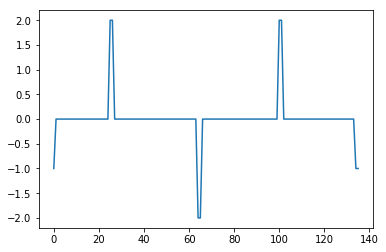

In [60]:
from scipy import signal

def generate_feature_code(data, win_size1=15, win_size2=10, distance=5, code_length=5):
    # WEJŚCIE:
    #                data - wektor sygnału
    #           win_size1 - długość okna do wstępnej filracji
    #           win_size2 - długość okna do filtracji sygnału skwantowanego
    #            distance - odległość między kolejnymi znajdowanymi peakami - wykrywanie zboczy sygnału
    #         code_length - długość kodu liczbowego wektora cech
    
    # WYJŚCIE:
    # signal_feature_code - wektor cech

    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    # Filtrowanie wstępne
    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

    # długość okna ruchomej średniej
    win_size1 = 15

    # współczynniki filtra ruchomej średniej
    b_lp1 = 1/win_size1 * np.ones(win_size1)

    # filtruj sygnał
    signal_filtered = signal.convolve(data, b_lp1, mode='same')

    # wykres
    # plt.plot(signal_filtered)

    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    # Tworzenie cech
    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

    # prealokacja wektora cech zerami
    signal_features_prime = np.zeros_like(data)

    # threshold jest ustawiony na średnią wartość energii w sygnale, 
    threshold = np.mean(signal_filtered**2)

    # gdy sygnał jest powyżej thresholdu cechy pierwotne przyjmują wartość 1,
    signal_features_prime[np.where(signal_filtered > threshold)] = 1

    # gdy sygnał jest poniżej thresholdu cechy pierwotne przyjmują wartość -1
    signal_features_prime[np.where(signal_filtered < -threshold)] = -1

    # wykres
    # plt.plot(signal_features_prime)

    #-----------------------------------------------------------------------------------------
    # Wygładzenie wykresu
    #-----------------------------------------------------------------------------------------

    # współczynniki filtra ruchomej średniej
    b_lp2 = 1/win_size2 * np.ones(win_size2)

    # filtruj sygnał
    signal_lpd = signal.convolve(signal_features_prime, b_lp2, mode='same')

    # kwantyzuj sygnału funkcją znaku
    signal_sign = np.sign(signal_lpd)

    # wykres
    # plt.plot(signal_sign)

    #-----------------------------------------------------------------------------------------
    # Różniczkowanie
    #-----------------------------------------------------------------------------------------

    # współczynniki filtra różniczkującego
    b_diff = np.array([1, 0, -1])

    # filtruj sygnał
    signal_diffd = signal.convolve(signal_sign, b_diff, mode='same')

    # wykres
    # plt.plot(signal_diffd)

    #-----------------------------------------------------------------------------------------
    # Znajdź lokalne ekstrema
    #-----------------------------------------------------------------------------------------

    # redukcja problemów z peakami na brzegach - rozszerzenie wektora zerami na brzegach
    signal_padded = np.pad(signal_diffd, (10,), 'constant', constant_values=(0,)) 

    # find_peaks wyznacza maksima lokalne
    indices_maxima = signal.find_peaks(signal_padded, distance=distance)[0]

    # aby wyznaczyć minima odwróć sygnał i użyj find peaks
    indices_minima = signal.find_peaks(-signal_padded, distance=distance)[0]

    # scal indeksy ze sobą oraz je posortuj
    indices = np.sort(np.concatenate((indices_minima, indices_maxima)))

    # wybierz ekstrema z sygnału tak aby powstał kod
    signal_feature_code = signal_padded[indices]

    #-----------------------------------------------------------------------------------------
    # Usuń powtarzające się pod rząd liczby
    #-----------------------------------------------------------------------------------------

    # na koniec wektora dodaj 0
    signal_feature_code = np.concatenate((signal_feature_code, [0]))

    # stwórz kopię wektora przesuniętą o jedną próbkę
    signal_feature_code_copy = np.roll(signal_feature_code,1)

    # weź tylko te indeksy, których próbki nie są identyczne
    signal_feature_code = signal_feature_code[signal_feature_code != signal_feature_code_copy]

    # usuń ostatnie 0
    signal_feature_code = signal_feature_code[0:-1]

    #-----------------------------------------------------------------------------------------
    # Sprawdź czy kod ma długość code_length
    #-----------------------------------------------------------------------------------------

    # jeśli jest krótszy - uzupełnij zerami
    if(len(signal_feature_code) < code_length):
        signal_feature_code = np.pad(signal_feature_code, (0, code_length-len(signal_feature_code)), 
                                   'constant', constant_values=(0,))

    # jeśli jest dłuższy - weź tylko code_length pierwszych wyrazów
    elif(len(signal_feature_code) > code_length):
        signal_feature_code = signal_feature_code[0:code_length]
        
    return signal_feature_code

# PRZYKŁAD ZASTOSOWANIA

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Dane do generowania nazw plików
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# ruchy
moves = ['kolo_']

# osoby
people = ['fj_']

# numer pomiaru
number = [4]

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Wybór pliku
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# ścieżka
path = './data/separated/'

# nazwy plików
filenames = generate_files_names(moves, people, number)

# wybór pliku
filename = path + filenames[0]

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Dane do generowania tablicy z danymi pomiarowymi
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#        t -> 0
#     roll -> 1
#    pitch -> 2
#      yaw -> 3
#     rotY -> 4
#     rotY -> 5
#     rotZ -> 6
# gravityX -> 7
# gravityY -> 8
# gravityZ -> 9
#     accX -> 10
#     accY -> 11
#     accZ -> 12
#  magnetX -> 13
#  magnetY -> 14
#  magnetZ -> 15

# nazwy kolumn
cols_headers = ['t', 'roll', 'pitch', 'yaw', 'rotX', 'rotY', 'rotZ', 'gravityX', 'gravityY',
                'gravityZ', 'accX', 'accY', 'accZ', 'magnetX', 'magnetY', 'magnetZ']

# licznik kolumn
cols = list(range(0,len(cols_headers)))

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Wczytanie pliku
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

data=read_PowerSense_file_np(filename, cols, cols_headers)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Wyrysowanie przyspieszeń
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# wybór danych
accY = data[:,11]
accZ = data[:,12]

# wykres
# plt.plot(accY)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Wyznaczenie wektora cech
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

signal_features = generate_feature_code(accZ)

# wypisanie kodu
print(signal_features)
